In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
dt = pd.read_csv('../data/spatial_merged_solid.csv')
dt_ = dt.loc[dt[['yelp_review_count','stats.tipCount']].dropna().index, :]

x = pd.read_csv('feature.csv',index_col = 0)
y = pd.read_csv('y.csv', index_col=0, names = ['ifA'])
yscore = pd.read_csv('yscore.csv', index_col=0, names = ['score'])

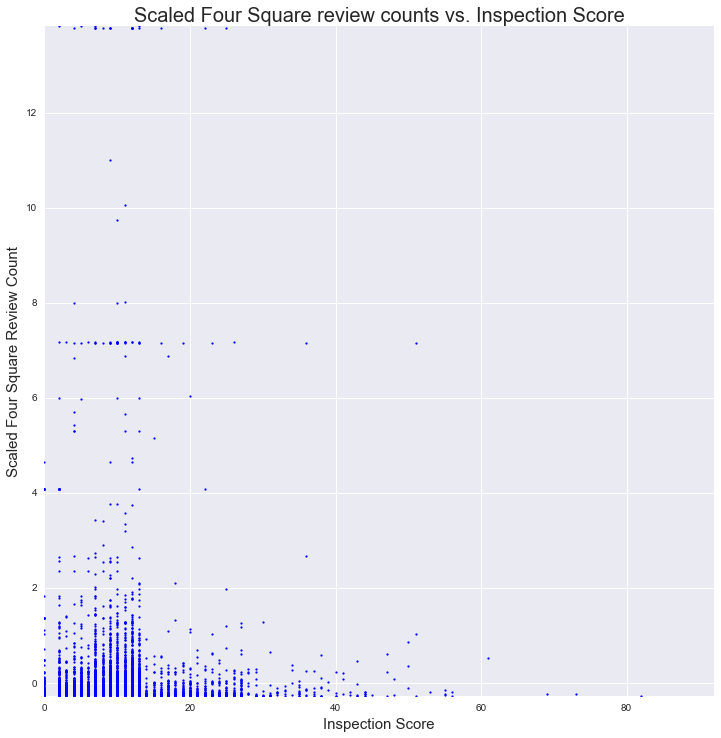

In [423]:
# inspection scores vs. four square review counts
plt.figure(figsize = [12,12])
plt.scatter(yscore, x['stats.tipCount'], s = 5, linewidths=0)
plt.xlabel('Inspection Score', fontsize = 15)
plt.ylabel('Scaled Four Square Review Count', fontsize = 15)
plt.xlim(0,92)
plt.ylim(x['stats.tipCount'].min(),x['stats.tipCount'].max())
plt.title('Scaled Four Square review counts vs. Inspection Score', fontsize = 20)
plt.savefig('../viz/frv_qt_ins_sc.png')

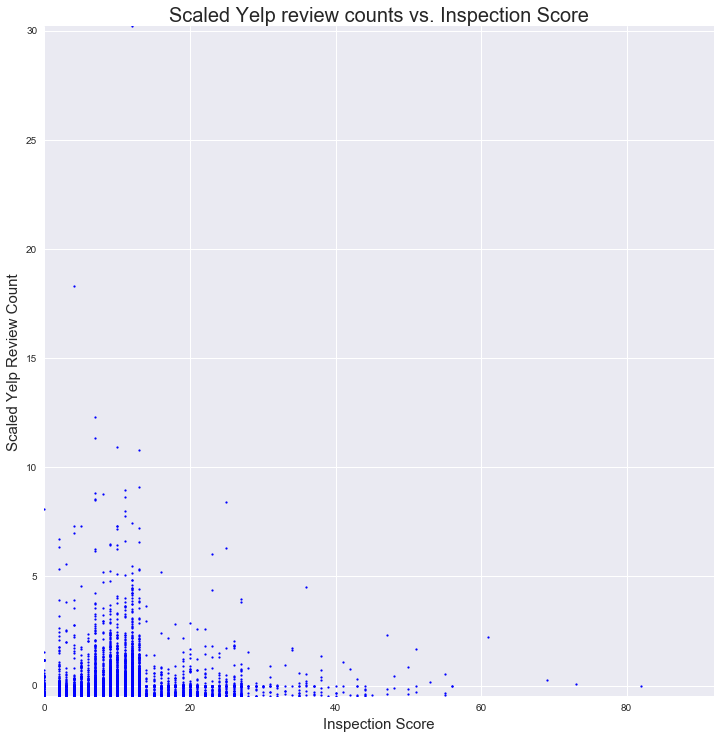

In [424]:
# inspection score vs. yelp review counts
plt.figure(figsize = [12,12])
plt.scatter(yscore, x['yelp_review_count'], s = 5, linewidths=0)
plt.xlabel('Inspection Score', fontsize = 15)
plt.ylabel('Scaled Yelp Review Count', fontsize = 15)
plt.xlim(0,92)
plt.ylim(x['yelp_review_count'].min(),x['yelp_review_count'].max())
plt.title('Scaled Yelp review counts vs. Inspection Score', fontsize = 20)
plt.savefig('../viz/yrv_qt_ins_sc.png')

In [406]:
# load google place results
gg = pd.read_csv('goog_rating_pl.csv')
f = pd.read_csv('final.csv')
f2 = pd.merge(f, gg, on = 'CAMIS', how = 'inner')

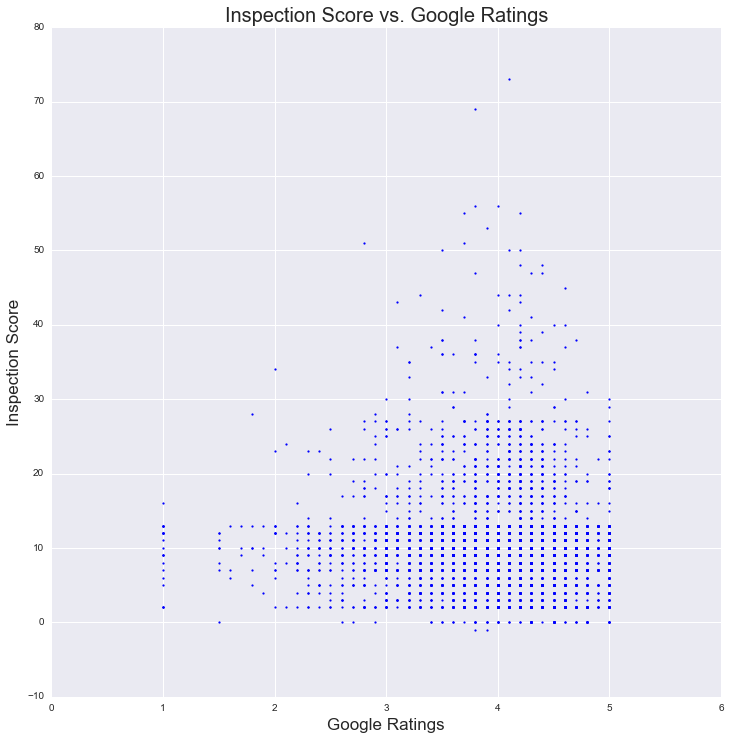

In [425]:
# inspction score vs. google ratings
plt.figure(figsize = [12,12])
plt.scatter(f2['google_rating'], f2.SCORE, s = 5, linewidths=0)
plt.xlabel('Google Ratings', fontsize = 17)
plt.ylabel('Inspection Score', fontsize = 17)
plt.title('Inspection Score vs. Google Ratings', fontsize = 20)
plt.savefig('../viz/grating_ins_sc.png')

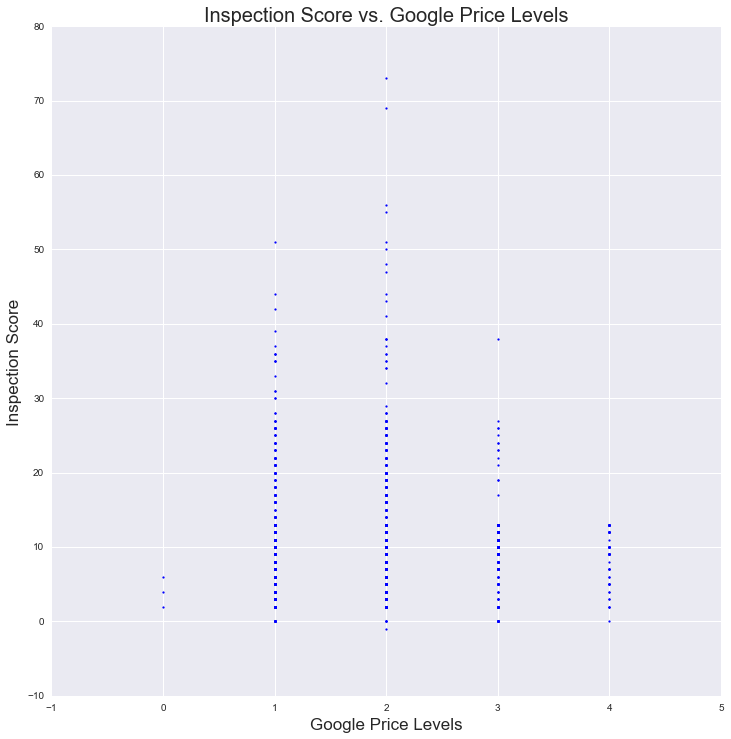

In [427]:
# inspection score vs. google price levels
plt.figure(figsize = [12,12])
plt.scatter(f2['google_price_level'], f2.SCORE, s = 5, linewidths=0)
plt.xlabel('Google Price Levels', fontsize = 17)
plt.ylabel('Inspection Score', fontsize = 17)
plt.title('Inspection Score vs. Google Price Levels', fontsize = 20)
plt.savefig('../viz/gprice_ins_sc.png')

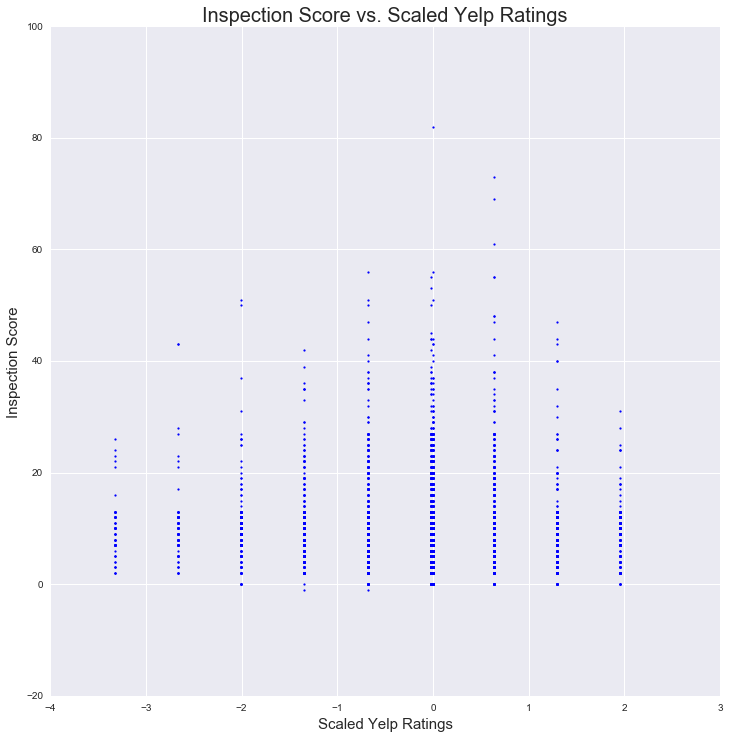

In [428]:
# inspection scores vs. scaled yelp ratings
plt.figure(figsize = [12,12])
plt.scatter(x['yelp_rating'], yscore, s = 5, linewidths=0)
plt.xlabel('Scaled Yelp Ratings', fontsize = 15)
plt.ylabel('Inspection Score', fontsize = 15)
plt.title('Inspection Score vs. Scaled Yelp Ratings', fontsize = 20)
plt.savefig('../viz/yrating_ins_sc.png')

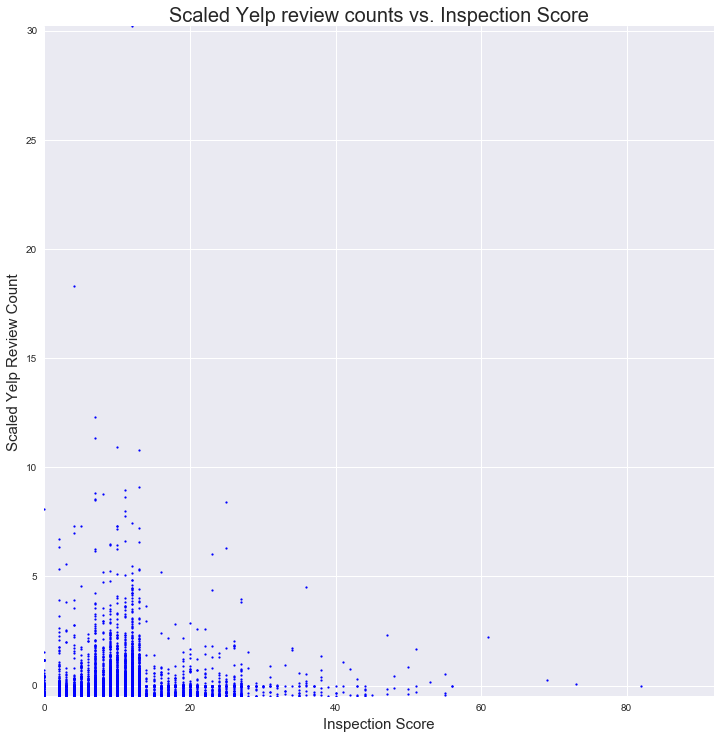

In [429]:
# inspection scores vs. yelp review counts
plt.figure(figsize = [12,12])
plt.scatter(yscore, x['yelp_review_count'], s = 5, linewidths=0)
plt.xlabel('Inspection Score', fontsize = 15)
plt.ylabel('Scaled Yelp Review Count', fontsize = 15)
plt.xlim(0,92)
plt.ylim(x['yelp_review_count'].min(),x['yelp_review_count'].max())
plt.title('Scaled Yelp review counts vs. Inspection Score', fontsize = 20)
plt.savefig('../viz/yrv_qt_ins_sc.png')

In [433]:
f2.head()

,Unnamed: 0_x,CAMIS,new_grade,INSPECTION DATE,VIOLATION CODE,SCORE,GRADE,CD,HealthArea,SanitDistr,...,is_desserts,is_seafood,is_icecream,failed,yrs_since_reno,bldg_age,Unnamed: 0_y,google_categories,google_price_level,google_rating
0,225,50060711,A,03/22/2017,10H,7.0,A,CD_107,HealthArea_3500,SanitDistr_7,...,0,0,0,0,-0.213410,-0.014729,376,NaN,NaN,NaN
1,259,50060463,A,03/02/2017,06F,13.0,A,CD_310,HealthArea_7820,SanitDistr_10,...,0,0,0,0,0.006221,-0.096720,439,NaN,NaN,NaN
2,266,50060418,A,03/22/2017,06C,9.0,A,CD_106,HealthArea_5000,SanitDistr_6,...,0,0,0,0,-0.213410,-0.190424,456,NaN,NaN,5.0
3,270,50060396,A,03/06/2017,10F,7.0,A,CD_414,HealthArea_3700,SanitDistr_14,...,0,0,0,0,0.013928,-0.088911,460,NaN,NaN,4.9
4,276,50060377,A,03/23/2017,04L,13.0,A,CD_401,HealthArea_400,SanitDistr_1,...,0,0,0,0,0.044753,-0.057677,467,NaN,2.0,4.3


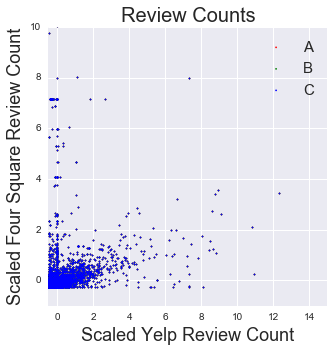

In [439]:
matplotlib.rc('legend', fontsize=15)
i = 0
plt.figure(figsize = [5,5])
from sklearn import preprocessing

for grade in ['A', 'B', 'C']:
    dt1 = f2[f2['new_grade'] == grade]
    plt.scatter(f2.yelp_review_count, f2['stats.tipCount'],  c = ['r', 'g', 'b'][i],
                 cmap='OrRd',\
                label = grade, linewidths=0, s = 3)
    i += 1

    plt.legend()
plt.xlabel('Scaled Yelp Review Count', fontsize = 18)
plt.ylabel('Scaled Four Square Review Count', fontsize = 18)
plt.xlim([-0.5,15])
plt.ylim([-1,10])
plt.title('Review Counts', fontsize = 20)
plt.savefig('../viz/review_count_zoom6.png')

# some mapping

In [441]:
cd = gpd.read_file('../viz/Community_Districts/geo_export_98897495-d961-4e67-8600-dd87c94a9de0.shp')
sanit = pd.read_csv('sanitation_joined.csv')
dt_sn = pd.merge(dt, sanit, on = 'CAMIS', how = 'left')
borough = ['M', 'BX', 'BK', 'Q', 'I']
dt_sn['sanicode'] = dt_sn.sanicode.apply(lambda x: float(str(x).replace('M', '1').replace('BX', '2').\
                                         replace('BK', '3').replace('Q', '4').replace('I', '5')))

cd2 = pd.merge(cd, dt_sn, left_on = 'boro_cd', right_on = 'sanicode')
gp = dt_sn.groupby(['new_grade','sanicode'], group_keys = False,as_index = False).size()
gp_cd = pd.DataFrame(dt_sn.groupby('sanicode').size())

gp_cd['A_p'] = gp['A']
gp_cd['A_p'] = gp_cd['A_p']/gp_cd[0]
cd.index = cd.boro_cd
cd['A_p'] = gp_cd['A_p']
cd['cd_p'] = 1 - gp_cd['A_p']

sanit['sanicode'] = sanit.sanicode.apply(lambda x: float(str(x).replace('M', '1').replace('BX', '2').\
                                         replace('BK', '3').replace('Q', '4').replace('I', '5')))
sanit.index = sanit.sanicode

In [442]:
sani_data = pd.read_json('https://data.cityofnewyork.us/resource/kuz6-hiwt.json')
sani_data['sanicode'] = map(lambda x: x[:-2].replace('N', '').replace('S','').replace('W','').replace('E','')+x[-2:], sani_data.district)

sani_data['sanicode'] = sani_data.sanicode.apply(lambda x: float(str(x).replace('M', '1').replace('BX', '2').\
                                         replace('BK', '3').replace('Q', '4').replace('I', '5')))

sani_data.index = sani_data.sanicode

cd['sanit_value'] = sani_data['capture_rate_mgp_total_mgp_max_mgp_']

cd.A_p = cd.A_p.fillna(0)
cd.cd_p = cd.cd_p.fillna(0)

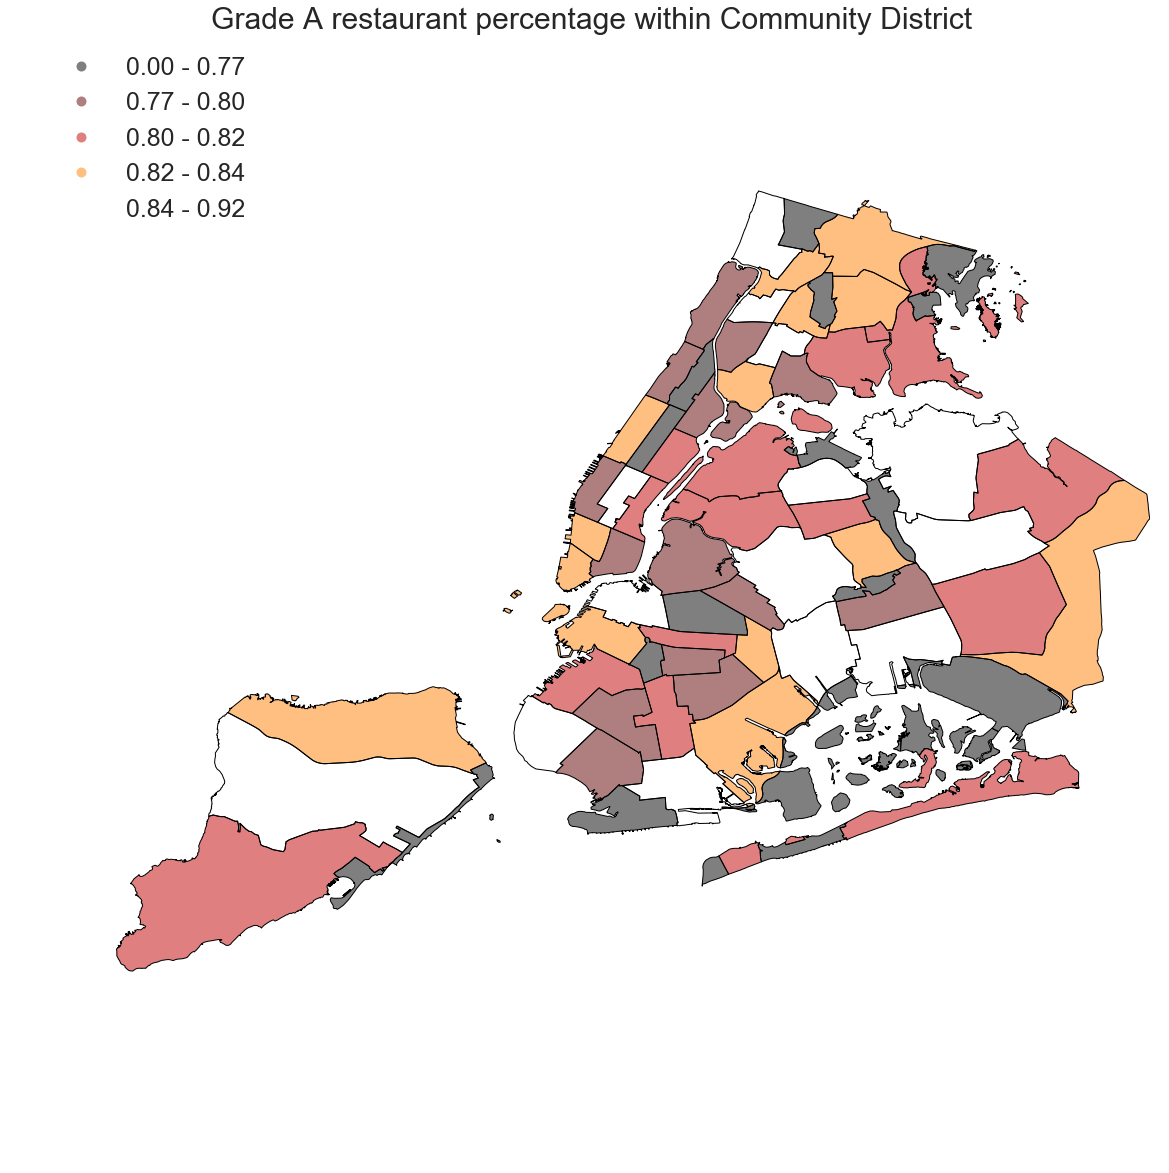

In [443]:
'''params = {'legend.fontsize': 20,
          'legend.linewidth': 2}
pylab.rcParams.update(params)'''
matplotlib.rc('legend', fontsize=25)
cd.plot(column = 'A_p', cmap =  'gist_heat', scheme = 'percentile', legend = True, figsize=[20,20])
plt.title('Grade A restaurant percentage within Community District', fontsize = 30)
plt.axis('off')
plt.savefig('../viz/grade_a.png',bbox_inches='tight')

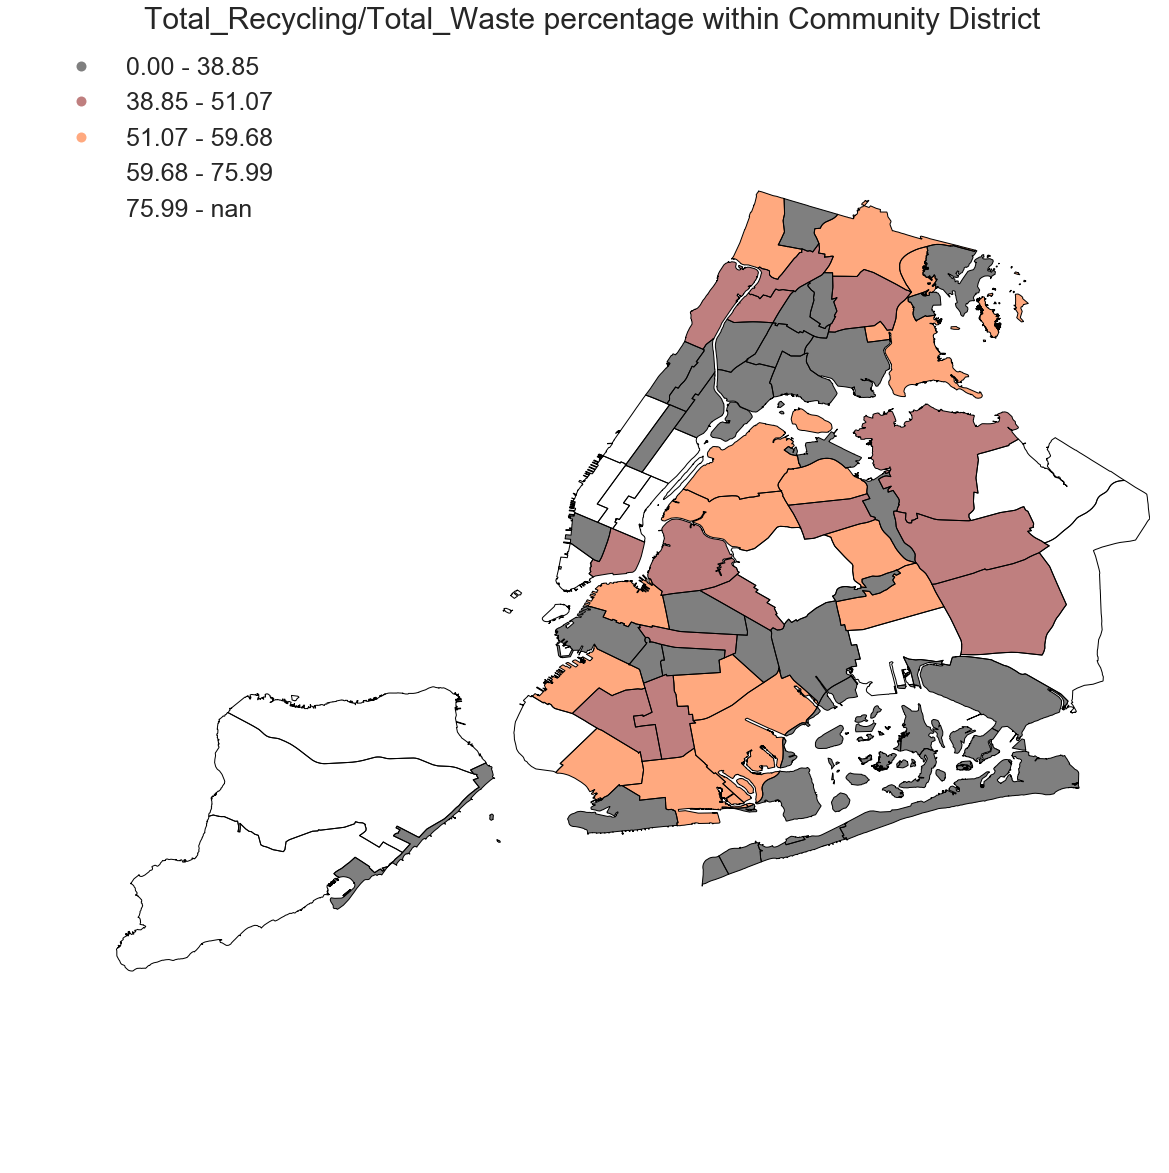

In [343]:
cd.plot(column = 'sanit_value', cmap = 'gist_heat', scheme = 'percentile',\
        legend = True, figsize=[20,20])
plt.title('Total_Recycling/Total_Waste percentage within Community District', fontsize = 30)
plt.axis('off')
plt.savefig('../viz/recycling_waste_percent.png', bbox_inches='tight')


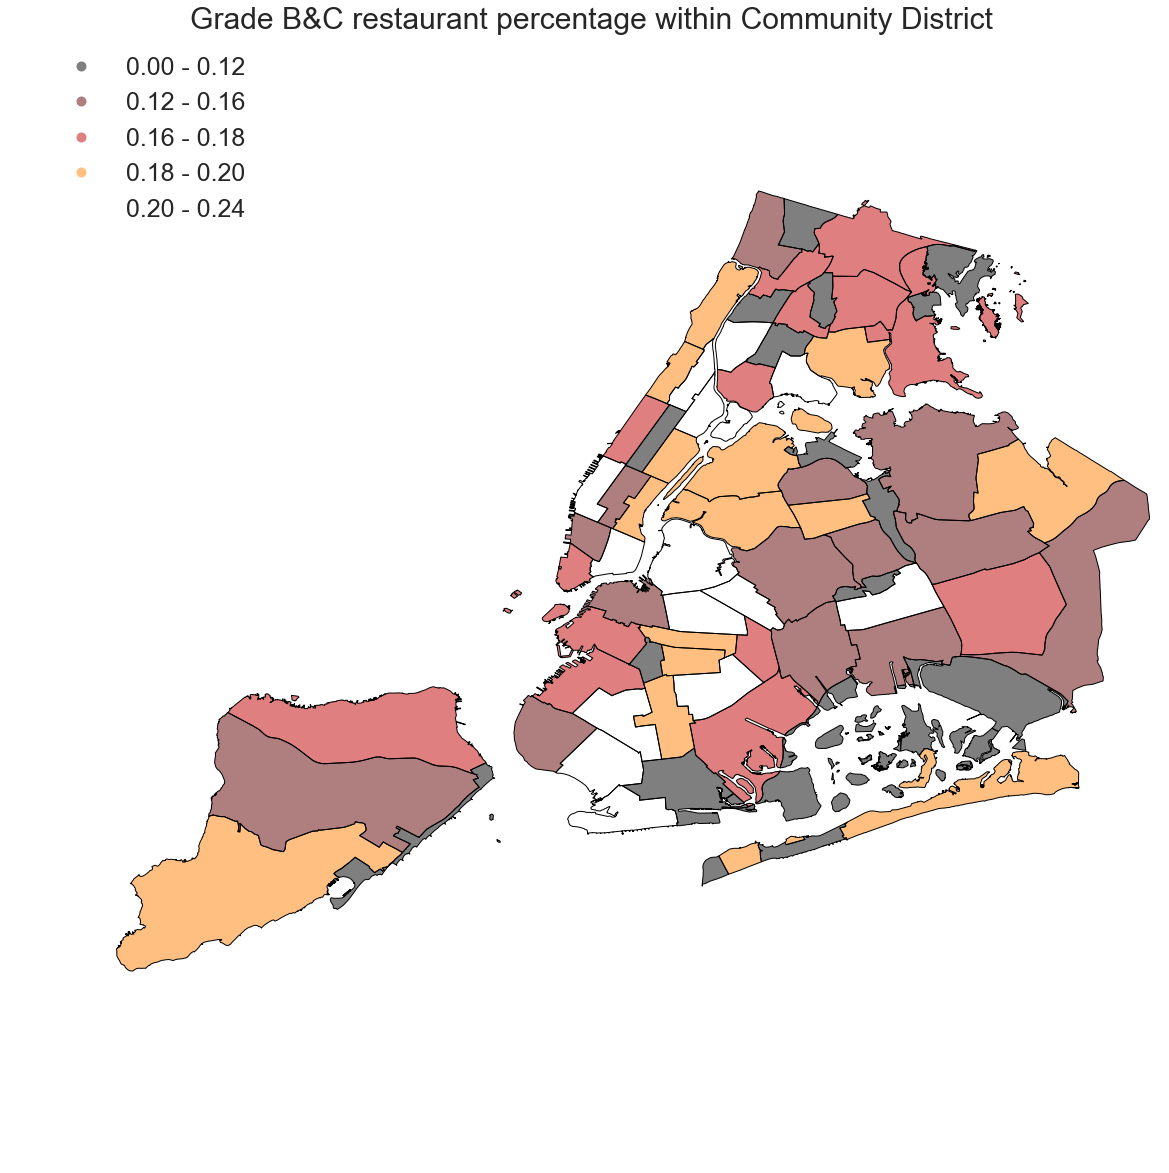

In [344]:
cd.plot(column = 'cd_p', cmap =  'gist_heat', scheme = 'percentile', legend = True, figsize=[20,20])
plt.title('Grade B&C restaurant percentage within Community District', fontsize = 30)
plt.axis('off')
plt.savefig('../viz/grade_cd.png',bbox_inches='tight')